<a href="https://colab.research.google.com/github/ipanditi/ML/blob/main/Dog_Cat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2022-08-15 18:28:55--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.120.128, 142.251.161.128, 74.125.126.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.120.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip.1’

cats_and_dogs_filte 100%[===================>]  65.43M   247MB/s    in 0.3s    

2022-08-15 18:28:56 (247 MB/s) - ‘cats_and_dogs_filtered.zip.1’ saved [68606236/68606236]



In [14]:

import zipfile

# Unzip the archive
local_zip = './cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()

zip_ref.close()

In [15]:
import os
base_dir = 'cats_and_dogs_filtered'
print("Contents of base directory:")
print(os.listdir(base_dir))

print("Contents of train directory:")
print(os.listdir(f'{base_dir}/train'))

print("Contents of validation directory:")
print(os.listdir(f'{base_dir}/validation'))


Contents of base directory:
['validation', 'vectorize.py', 'train']
Contents of train directory:
['cats', 'dogs']
Contents of validation directory:
['cats', 'dogs']


In [16]:
import os
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

#Directory with training 🙀 and dogs
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

#Directory for cats and dogs validation
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [17]:
train_cats_fnames = os.listdir(train_cats_dir)
train_dogs_fnames = os.listdir(train_dogs_dir)

print(train_cats_fnames[:10])

print(train_dogs_fnames[:10])

['cat.696.jpg', 'cat.531.jpg', 'cat.188.jpg', 'cat.293.jpg', 'cat.352.jpg', 'cat.934.jpg', 'cat.860.jpg', 'cat.669.jpg', 'cat.214.jpg', 'cat.208.jpg']
['dog.507.jpg', 'dog.976.jpg', 'dog.21.jpg', 'dog.414.jpg', 'dog.890.jpg', 'dog.991.jpg', 'dog.278.jpg', 'dog.990.jpg', 'dog.982.jpg', 'dog.400.jpg']


In [18]:
print('total training cat images :', len(os.listdir(train_cats_dir)))
print('total training dog images :', len(os.listdir(train_dogs_dir)))

print('total validation cat images :', len(os.listdir(validation_cats_dir)))
print('total validation dogs images :', len(os.listdir(validation_dogs_dir)))

total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dogs images : 500


In [19]:
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

#4*4 graph
nrows = 4
ncols = 4
pic_index = 0

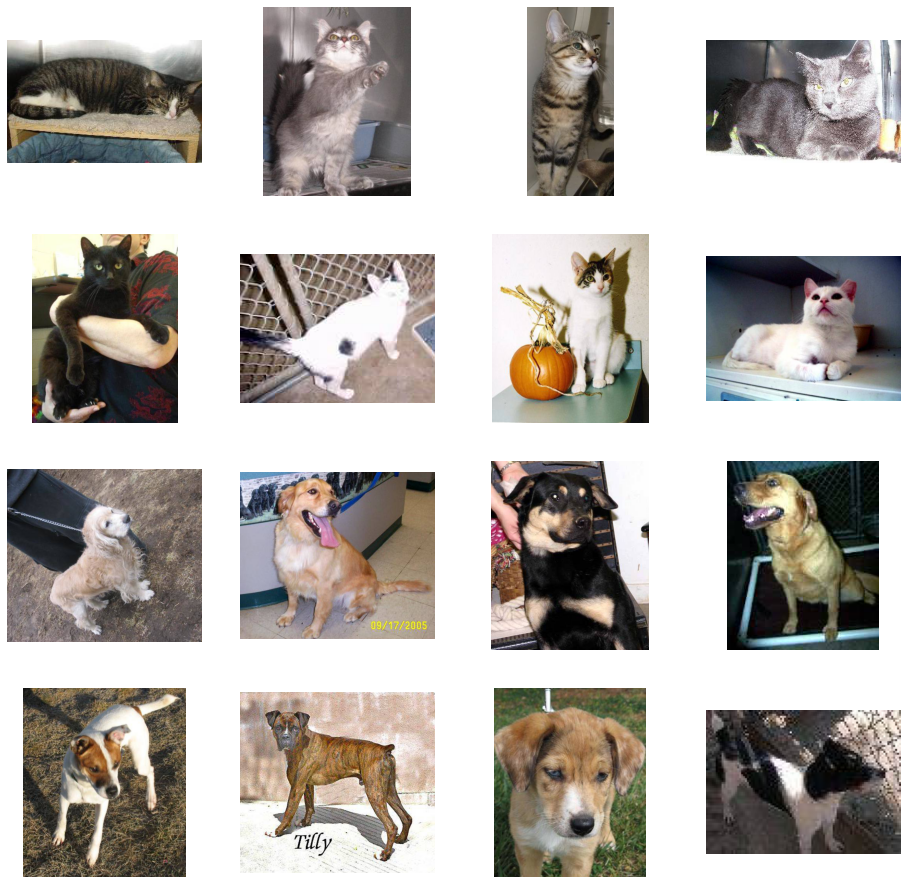

In [8]:
#Setup display
fig  = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)
pic_index += 8
next_cat_pix = [os.path.join(train_cats_dir, fname)
                for fname in train_cats_fnames[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dogs_dir, fname)
                for fname in train_dogs_fnames[pic_index-8:pic_index]]
for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis('Off')
  img = mpimg.imread(img_path)
  plt.imshow(img)
plt.show()

In [20]:
import tensorflow as tf

#Define the model
model  = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [22]:
from tensorflow.keras.optimizers import RMSprop
#Complie the model 
model.compile(optimizer=RMSprop(lr=0.001),
              loss  = 'binary_crossentropy',
              metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [23]:
#Data preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Rescaling
train_datagen  = ImageDataGenerator(rescale=1.0/255.)
test_datagen  = ImageDataGenerator(rescale=1.0/255.)

#Flow training images in batches of 20
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 20,
                                                    class_mode = 'binary',
                                                    target_size=(150,150))
#Flow validation images in batches of 20
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                    batch_size = 20,
                                                    class_mode = 'binary',
                                                    target_size=(150,150))


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [24]:
#Training
history = model.fit(
    train_generator,
    epochs=15,
    validation_data = validation_generator,
    verbose=2
)

Epoch 1/15
100/100 - 59s - loss: 0.7248 - accuracy: 0.5665 - val_loss: 0.6420 - val_accuracy: 0.6570 - 59s/epoch - 591ms/step
Epoch 2/15
100/100 - 58s - loss: 0.6197 - accuracy: 0.6815 - val_loss: 1.0130 - val_accuracy: 0.5290 - 58s/epoch - 577ms/step
Epoch 3/15
100/100 - 58s - loss: 0.5329 - accuracy: 0.7290 - val_loss: 0.5835 - val_accuracy: 0.6820 - 58s/epoch - 578ms/step
Epoch 4/15
100/100 - 57s - loss: 0.4592 - accuracy: 0.7775 - val_loss: 0.7362 - val_accuracy: 0.6760 - 57s/epoch - 574ms/step
Epoch 5/15
100/100 - 57s - loss: 0.3886 - accuracy: 0.8290 - val_loss: 0.5839 - val_accuracy: 0.7090 - 57s/epoch - 575ms/step
Epoch 6/15
100/100 - 57s - loss: 0.2990 - accuracy: 0.8765 - val_loss: 0.7225 - val_accuracy: 0.7130 - 57s/epoch - 573ms/step
Epoch 7/15
100/100 - 58s - loss: 0.2257 - accuracy: 0.9070 - val_loss: 0.8126 - val_accuracy: 0.6850 - 58s/epoch - 577ms/step
Epoch 8/15
100/100 - 58s - loss: 0.1599 - accuracy: 0.9430 - val_loss: 0.8492 - val_accuracy: 0.6960 - 58s/epoch - 585

In [27]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  
  x=image.img_to_array(img)
  x /= 255
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  
  print(classes[0])
  
  if classes[0]>0.5:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")

Saving 114f7b6656cdbd89351154b2d2f32112.jpg to 114f7b6656cdbd89351154b2d2f32112.jpg
[1.0607573e-07]
114f7b6656cdbd89351154b2d2f32112.jpg is a cat


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in true_divide


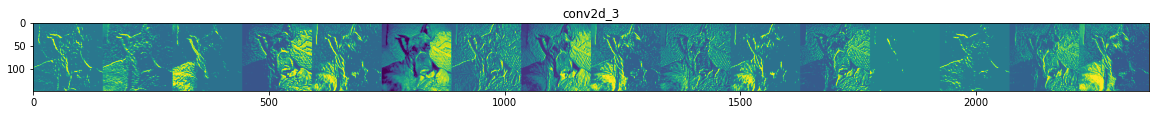

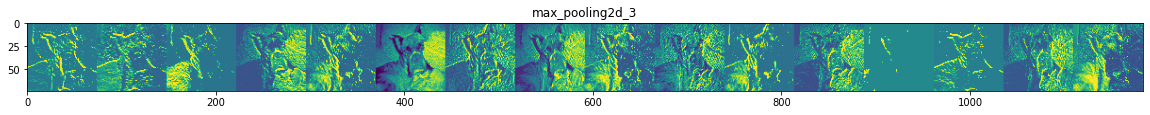

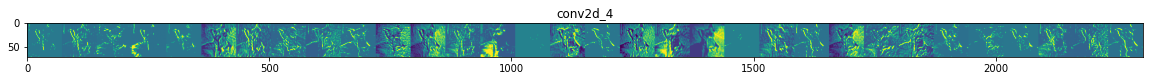

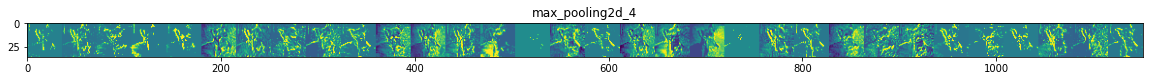

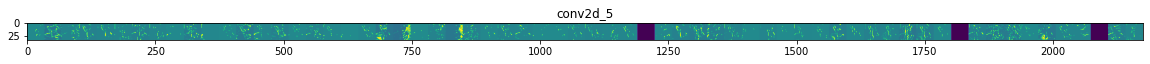

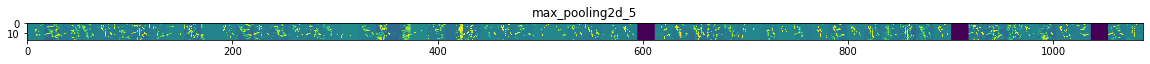

In [29]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model
successive_outputs = [layer.output for layer in model.layers]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Prepare a random input image from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cats_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dogs_fnames]
img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Scale by 1/255
x /= 255.0

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4:
    
    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 

Text(0.5, 1.0, 'Training and validation loss')

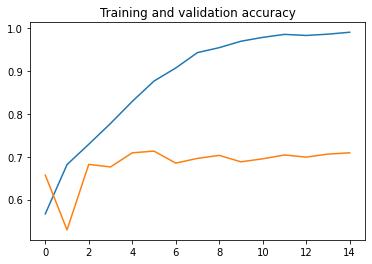

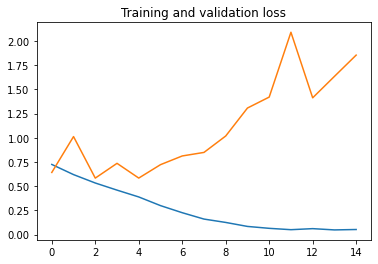

In [30]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )